<h1> Images </h1>

<b> Images: load, display and colours</b>

In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from PIL import Image 
from PIL import ImageDraw
import numpy as np
import matplotlib.cm as cm
from urllib.request import urlopen
from PIL import ImageFont
from skimage import morphology


In [2]:
target_url = "http://upload.wikimedia.org/wikipedia/commons/8/82/SEM_blood_cells.jpg"
im = Image.open(urlopen(target_url))
type(im)

PIL.JpegImagePlugin.JpegImageFile

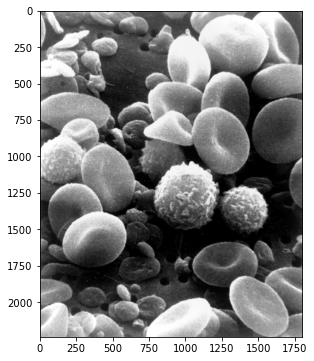

In [3]:
plt.figure(figsize = [11,6])
plt.imshow(im)

In [4]:
im2 = np.array(im)
print(im2.shape,im2.dtype)
im2[0,0]

(2239, 1800, 3) uint8


array([146, 146, 146], dtype=uint8)

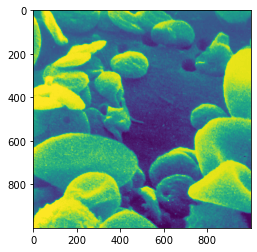

In [5]:
plt.imshow(im2[0:1000,0:1000,0])


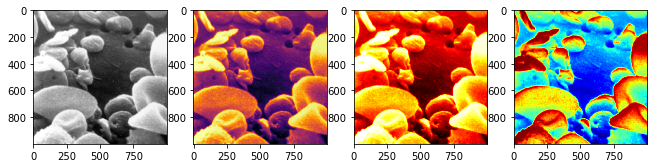

In [6]:
fig2 = plt.figure(figsize = [11,6])
fig2.add_subplot(1,4,1)
plt.imshow(im2[0:1000,0:1000,0],cmap =cm.gray)
fig2.add_subplot(1,4,2)
plt.imshow(im2[0:1000,0:1000,0],cmap =cm.inferno)
fig2.add_subplot(1,4,3)
plt.imshow(im2[0:1000,0:1000,0],cmap =cm.hot)
fig2.add_subplot(1,4,4)
plt.imshow(im2[0:1000,0:1000,0],cmap =cm.jet)

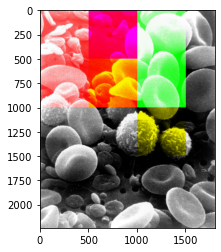

In [7]:
im2[0:500,0:500,0] = 250
im2[500:1000,0:500,0] =0
im2[0:500,500:1000,1]=0
im2[500:1000,500:1000,2]=0
im2[0:1000,0:1000,0]=250
im2[0:500,1000:1500,1]=250
im2[1000:1500,1000:1500,2]=0
im2[1000:1500,500:100,0:1]=250
im2[500:1000,1000:1500,1:2]=250
plt.imshow(im2)

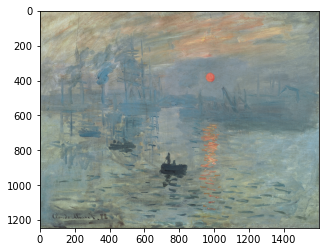

In [8]:
target_url = 'https://upload.wikimedia.org/wikipedia/commons/5/54/Claude_Monet%2C_Impression%2C_soleil_levant.jpg'
im_col = Image.open(urlopen(target_url))
plt.figure(figsize = [5,6])
plt.imshow(im_col)

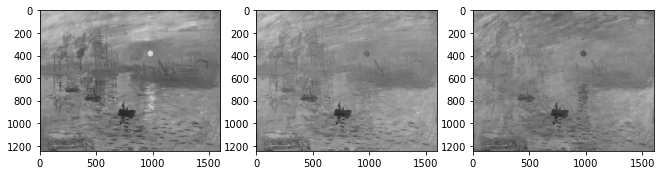

In [9]:
im_col2 = np.array(im_col)
fig2 = plt.figure(figsize = [11,6])
ax311 = fig2.add_subplot(1,3,1)
plt.imshow(im_col2[:,:,0],cmap =cm.gray)
ax312 = fig2.add_subplot(1,3,2)
plt.imshow(im_col2[:,:,1],cmap =cm.gray)
ax313  = fig2.add_subplot(1,3,3)
plt.imshow(im_col2[:,:,2],cmap =cm.gray)


<B> <h1> Basic Image Manipulation </h1></B>

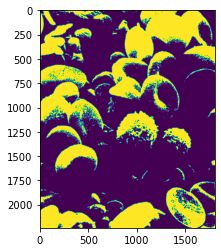

In [10]:
im3 = np.array(im)
im4 = im3[:,:,0]
plt.imshow(im4>150)

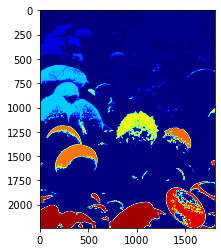

In [11]:
from skimage import measure
im5 = measure.label(im4>150)
plt.imshow(im5,cmap=cm.jet)

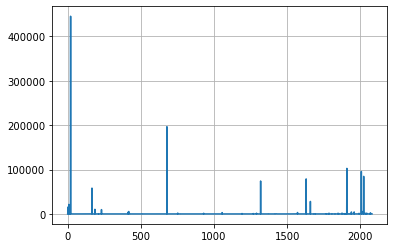

In [12]:
numLabels = np.max(im5)
im5_properties = measure.regionprops(im5)
areaRegions = np.zeros(numLabels)
for i in range(numLabels):
    areaRegions[i] = im5_properties[i].area
plt.plot(areaRegions)
plt.grid()

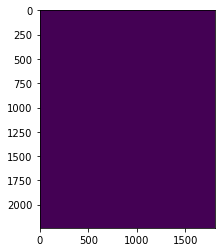

In [13]:
plt.imshow(im5==18)

In [14]:
from ismember import ismember

In [15]:
numLargeRegions = sum(areaRegions>1000)

In [16]:
largeRegions = np.zeros(numLargeRegions)
k = 0
for i in range(numLabels):
    if(areaRegions[i]>10000):
        largeRegions[k]=i
        k=k+1

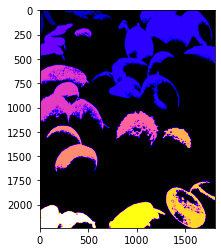

In [17]:
im6 = ismember(im5,largeRegions+1)
im7 = measure.label(im6[0]>0)
plt.imshow(im7,cmap=cm.gnuplot2)

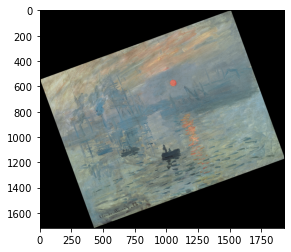

In [18]:
import scipy
im_col_rot = scipy.ndimage.interpolation.rotate(im_col,20)
plt.imshow(im_col_rot)

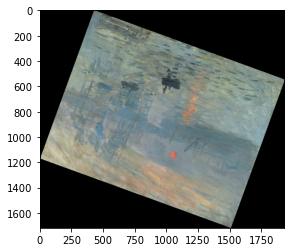

In [19]:
plt.imshow(im_col_rot[::-1,:,:])

<H1><B>  Detect specific regions of an image</B></H1>

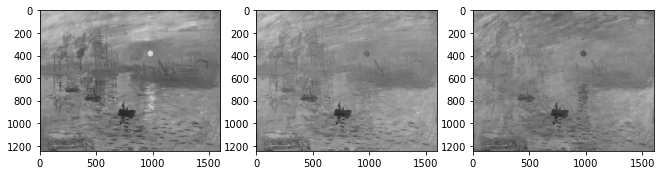

In [20]:
im_col2 = np.array(im_col)
fig2 = plt.figure(figsize = [11,6])
ax311 = fig2.add_subplot(1,3,1)
plt.imshow(im_col2[:,:,0],cmap =cm.gray)
ax312 = fig2.add_subplot(1,3,2)
plt.imshow(im_col2[:,:,1],cmap =cm.gray)
ax313  = fig2.add_subplot(1,3,3)
plt.imshow(im_col2[:,:,2],cmap =cm.gray)



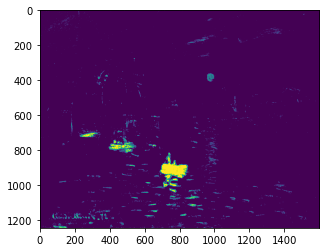

In [21]:
sun = (im_col2[:,:,0]>210)
boat = (im_col2[:,:,0]<75)
plt.imshow(sun+2*boat)

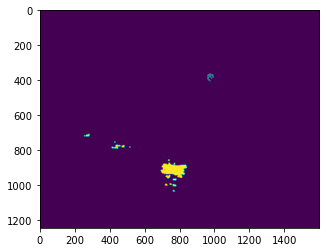

In [22]:
sun2 = morphology.opening(sun,morphology.disk(3))
boat2 = morphology.opening(boat,morphology.disk(4))
plt.imshow(sun2+2*boat2)

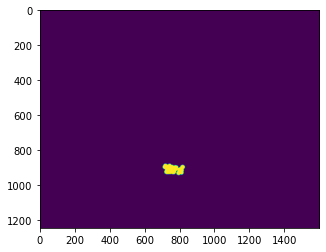

In [23]:
sun3 = morphology.opening(sun2,morphology.disk(9))
boat3 = morphology.opening(boat2,morphology.disk(12))
plt.imshow(sun3+2*boat3)

In [25]:
sun_properties = measure.regionprops( measure.label(sun3))
boat_properties = measure.regionprops( measure.label(boat3))
#print(sun_properties[0].centroid,boat_properties[0].centroid)

In [ ]:
draw = ImageDraw.Draw(im_col)
font = ImageFont.truetype("arial.ttf",70)
draw.text(sun_properties[0].centroid[1],boat_properties[0].centroid[0],'The sun',font = font)
draw.text(sun_properties[0].centroid[1],boat_properties[0].centroid[0],'The boat',font = font)
plt.imshow(im_col)